Text(0, 0.5, 'eficiência aerodinâmica')

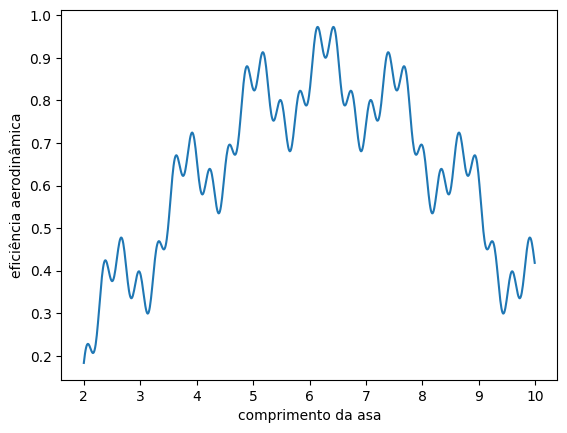

In [ ]:
# algoritmo genético que otimiza o comprimento da asa de um aviao
# o parâmetro a ser otimizado é o comprimento da asa, e o objetivo da otimização
# é maximizar a eficiência aerodinâmica, que vai variar de 0 até 1.
# o comprimeto da asa vai varias de 2 até 10 metros

import numpy as np
import matplotlib.pyplot as plt

#função fictícia, apenas para exemplo, mas sem correspondência física
#com a eficiência aerodiâmica:
def eficiencia_aerodinamica(comprimento_asa):
  return (np.sin(comprimento_asa*5+np.pi*0.5)+1)*0.1+(np.sin(comprimento_asa*0.5-np.pi*0.5)+1)*0.4-(np.sin(comprimento_asa*20+np.pi*0.5)+1)*0.05

#cria números entre 2 e 10, com passo de 0.1
comprimentos=np.arange(2, 10, 0.01)
eficiencia=eficiencia_aerodinamica(comprimentos)
plt.plot(comprimentos,eficiencia)
plt.xlabel("comprimento da asa")
plt.ylabel("eficiência aerodinâmica")

In [ ]:
import random
#função que transforma o genótipo no fenótipo
def calc_fenotipo(genotipo):
  val=0;
  for i in range(len(genotipo)):
    val=val+genotipo[i]*10**i

  min=2.0
  max=10.0
  quant_digitos=len(genotipo)
  max_genotipo=float(10**quant_digitos-1)
  return (val/max_genotipo)*(max-min)+min


#gera população inicial
def gera_pop_inicial(tam_pop,quant_digitos):
  pop=[]
  for i in range(tam_pop):
    genotipo=[]
    for i2 in range(quant_digitos):
      genotipo.append(random.randint(0,9))
    pop.append(genotipo)
  return pop

#calcula a aptidão do genótipo
def calc_aptidao(genotipo):
  fenotipo=calc_fenotipo(genotipo)
  aptidao=eficiencia_aerodinamica(fenotipo)
  return aptidao

#função que recebe dois códigos genéticos e gera um filho
def cruzamento(genitor1, genitor2):
  ponto = random.randint(1,len(genitor1))
  filho = genitor1[0:ponto]+genitor2[ponto:]
  return filho

#função que pode aleatoriamente mudar algum dígito
def mutacao(genotipo, taxa_mutacao):
  for i in range(len(genotipo)):
    if random.random()<taxa_mutacao:
      genotipo[i]=random.randint(0,9)
  return genotipo

#gera a próxima geração da população a partir dos genitores
def reproducao(genitores, tam_pop, taxa_mutacao):
  pop=[]
  for i in range(tam_pop):
    #random.choice escolhe um elemento aleatoriamente da lista
    genitor1=random.choice(genitores)
    genitor2=random.choice(genitores)
    filho=cruzamento(genitor1, genitor2)
    filho=mutacao(filho, taxa_mutacao)
    pop.append(filho)
  return pop

#seleciona os genitores usando torneios
def selecao(pop, quant_selecao, tam_torneio):
  genitores=[]
  for i in range(quant_selecao):
    #realiza o torneio
    selecionado=None
    max_aptidao=-np.inf
    for i2 in range(tam_torneio):
      genotipo=random.choice(pop)
      aptidao=calc_aptidao(genotipo)
      if aptidao>max_aptidao:
        selecionado=genotipo
        max_aptidao=aptidao
    genitores.append(selecionado)
  return genitores

#retorna o melhor elemento da população
def get_melhor_genotipo(pop):
  melhor_genotipo=None
  max_aptidao=-np.inf
  for genotipo in pop:
    aptidao=calc_aptidao(genotipo)
    if aptidao>max_aptidao:
      melhor_genotipo=genotipo
      max_aptidao=aptidao
  return melhor_genotipo, max_aptidao

#algoritmo genético
def algoritmo_genetico(quant_geracoes, tam_pop, quant_digitos, quant_selecao, taxa_mutacao, tam_torneio):
  melhor_genotipo=None
  max_aptidao=-np.inf
  aptidoes=[]
  pop=gera_pop_inicial(tam_pop,quant_digitos)
  genotipo,aptidao=get_melhor_genotipo(pop)
  aptidoes.append(aptidao)
  for i in range(quant_geracoes):
    genitores=selecao(pop,quant_selecao,tam_torneio)
    pop=reproducao(genitores,tam_pop,taxa_mutacao)
    genotipo,aptidao=get_melhor_genotipo(pop)
    aptidoes.append(aptidao)
    if aptidao>max_aptidao:
      melhor_genotipo=genotipo
      max_aptidao=aptidao
  return calc_fenotipo(melhor_genotipo), aptidoes



Melhor comprimento de asa =  6.423164231642317  com eficiência =  0.9726157546097429


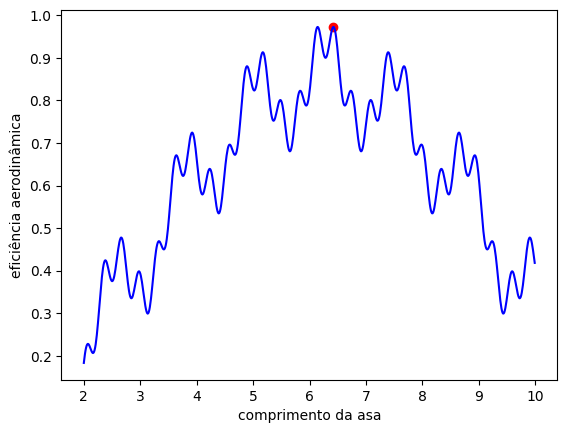

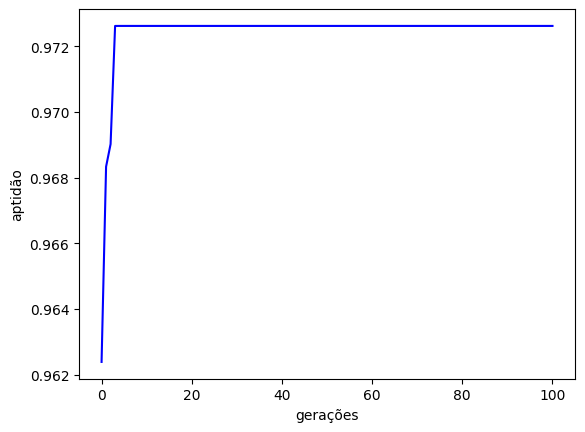

In [ ]:
#testa o algoritmo genético
quant_geracoes=100
tam_pop=100
quant_digitos=5
quant_selecao=20
taxa_mutacao=0.02
tam_torneio=5

resposta, aptidoes=algoritmo_genetico(quant_geracoes, tam_pop, quant_digitos, quant_selecao, taxa_mutacao, tam_torneio)
res_eficiencia=eficiencia_aerodinamica(resposta)
print("Melhor comprimento de asa = ",resposta," com eficiência = ",res_eficiencia)
#cria números entre 2 e 10, com passo de 0.1
comprimentos=np.arange(2, 10, 0.01)
eficiencia=eficiencia_aerodinamica(comprimentos)
plt.plot(resposta,res_eficiencia,'ro')
plt.plot(comprimentos,eficiencia,'b-')
plt.xlabel("comprimento da asa")
plt.ylabel("eficiência aerodinâmica")
plt.show()

plt.plot(aptidoes,'-b')
plt.xlabel("gerações")
plt.ylabel("aptidão")
plt.show()




